# Projeto 1 - Classificador Naive-Bayes com Tweets


## Objetivo

* Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um determinado produto no Twitter. A empresa deseja que você crie um programa selecionealgumas mensagens disponíveis no Twitter que mencionam esse produto e classifique-as como"relevante" ou "irrelevante".

* Com isso, essa empresa deseja que mensagens relevantes, que denigrem o nome do produto, ou que mereçam destaque, disparem um foco de atenção da área de marketing.

* Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamentedo Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails, porexemplo. Esse classificador permite calcular qual a probabilidade de uma mensagem ser relevante dada as palavras em seu conteúdo.

* Para realizar o MVP (minimum viable product) do projeto, você precisa implementar umaversão do classificador que "aprende" o que é relevante com uma base de treinamento e compara a performance dos resultados com uma base de testes.

* Após validado, o seu protótipo poderá também capturar e classificar automaticamente as mensagens da plataforma.

## Integrantes do Projeto

**Nome:** Wilgner Lopes Araujo

**Nome:** Fabricio Neri Lima

## Informações relevantes

* Esse arquivo representa a ultima etapa do projeto onde haverá todas as etapas de cleaning da base de dados e implantação do algoritmo de classificação

* O arquivo que pesquisa os tweets esta na pasta Arquivo Jupyter/Projeto1_Obtenção_dos_tweets nessa mesma raiz do repositório

* A base de dados se encontra na pasta dados/Valorant.xlsx

* A conta utiliza no twitter para obtenção de dados é @AnalyticsInsper

* O produto escolhido para o projeto é o jogo : **Valorant**

* Os criterios para a classificação dos tweets na primeira etapa do projeto foram: Os tweets que falavam de alguma forma positiva ou negativa sobre o jogo ou até mesmo que relacionavam o jogo a alguma emoção, foram classificados como relevantes. Os demais foram classificados como Irrelevantes.


# Começando

## Declarando as bibliotecas

In [65]:
#importando cada uma das bibliotecas que serão usadas
import math
import numpy as np
import pandas as pd
import re
import functools
import operator
import emoji

## Abrindo a base de dados e visualizando os primeiros 5 termos

In [66]:
#abrindo o arquivo de treino
dados = pd.read_excel('../dados/Valorant.xlsx')
dados.head()

,Treinamento,Etiquetas,Classificado
0,@caos__0 eu no valorant :v\nfon,2,Irrelevante
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante
3,"deletei o valorant, agora meu pc volta a ligar em 3 segundos",1,Relevante
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante


## Informações do DataFrame

In [67]:
#lendo as informações da base de treino
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Treinamento   500 non-null    object
 1   Etiquetas     500 non-null    int64 
 2   Classificado  500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


## Classificando 

* A coluna Treinamento e Classificado são categoricas, pois ambas são variaveis qualitativas nominais

In [68]:
#definindo como tipo como variáveis categóricas
dados['Treinamento'] = dados['Treinamento'].astype('category')
dados['Classificado'] = dados['Classificado'].astype('category')

## Iniciando as coletas de probabilidades

### Analisando frequencia de Relevante e Irrelevante na base de dados

In [69]:
#identificando as probabilidades de Relevante P(R) e probabilidade de Irrelevante P(R_c)
Probabilidade_total = dados.Classificado.value_counts(True)
Probabilidade_total

Irrelevante    0.542
Relevante      0.458
Name: Classificado, dtype: float64

## Declarando as variaveis de probabilidade

* Considere P(R) para probabilidade de ser Relevante
* Considere P(R_c) para probabilidade de ser Irrelevante

In [70]:
#Probabilidade de Irrelevantes
P_R_c = Probabilidade_total[0]
#Probabilidade de relevantes
P_R = Probabilidade_total[1]

## Antes de prosseguir vamos limpar o codigo

* Será removido os seguintes simbolos: ! - . : ? ; _ , < > / \ ) ( # % $ | \n

In [71]:
#Função utilizada para realizar a limpeza no Dataframe
def limpa_texto(text):
    
    #import string
    punctuation = '[!-.:?;_,<>/\][)(#%$|\n]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

## Alem disso vamos espaçar os emojis entre si

* O codigo utilizado foi extraido e modificado do seguinte site: https://stackoverflow.com/questions/49921720/how-to-split-emoji-from-each-other-python

* O codigo utiliza a biblioteca emoji, functools, operator para atingir o objetivo de separar os emojis

In [72]:
def separa_emoji(text):
    frase = text
    frase_split_emoji = emoji.get_emoji_regexp().split(frase)
    frase_split_com_espaço_em_branco = [substr.split() for substr in frase_split_emoji]
    frase_split = functools.reduce(operator.concat, frase_split_com_espaço_em_branco)
    frase_espacada = ' '.join(frase_split)
    return frase_espacada

## Aplicando a função de limpeza na base de dados

In [73]:
#Aplicando as funções no dataframe
dados['Treinamento'] = dados['Treinamento'].apply(limpa_texto)
dados['Treinamento'] = dados['Treinamento'].apply(separa_emoji)

In [74]:
# Checando se funcionou e se os emojis ainda funcionam
pd.set_option('max_colwidth', None)
dados.head(10)

,Treinamento,Etiquetas,Classificado
0,@caos 0 eu no valorant v fon,2,Irrelevante
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante
5,voltei a jogar valorant so por causa do mata mata,1,Relevante
6,viciei em valorant esse é o tweet,1,Relevante
7,@zncabral free fire fez mais sucesso que o valorant só no brasil no resto do mundo quase ngm joga isso,1,Relevante
8,alguem me explica o motivo das 12 do valorant menos a shorty atirar tão bem de longe tipo comparando com cs e fortnite não faz sentido os cara vai de bucky atacando vai se fuder,1,Relevante
9,rt @leozjn o matchmaking do valorant n faz o minimo sentido,1,Relevante


## Preparação para fazer o smoothing

* Primeiro passo: Verificar a contagem de cada palavra no grupo de DataFrame Relevante e Irrelevante

In [75]:
# Separando o dataFrame em duas Strings com todas as palavras do grupo de Relevante e Irrelevante
dados_relevantes = dados[dados.Classificado == 'Relevante']
dados_irrelevantes = dados[dados.Classificado == 'Irrelevante']

# Transformando colunas em listas de palavras
palavras_relevantes = str(dados_relevantes.Treinamento.to_list()).lower().split()
palavras_irrelevantes = str(dados_irrelevantes.Treinamento.to_list()).lower().split()

# Contando aparição total das palavras
contagem_relevantes = pd.Series(palavras_relevantes).value_counts()
contagem_irrelevante = pd.Series(palavras_irrelevantes).value_counts()

# Somando total de contagens
N_relevante = contagem_relevantes.sum()
N_irrelevante = contagem_irrelevante.sum()




* Segundo passo: Aplicar o alfa nas contagem das palavras e o alfa x V no total de palavras 

In [76]:
#criando um alpha para realizar a técnica de smoothing
alfa = 1
#Criando um V para estimar o total de palavras da lingua 
V = 10e6

# Contagem + alfa
contagem_relevantes_com_alfa = contagem_relevantes + alfa
contagem_irrelevantes_com_alfa = contagem_irrelevante + alfa

# Total + alfaV
N_relevante_com_alfaV = N_relevante+alfa*V
N_irrelevante_com_alfaV = N_irrelevante+alfa*V


* Calculando probabilidade de cada palavra dada que é relevante e irrelevante



In [113]:
P_palavra_dado_relevante = contagem_relevantes_com_alfa/N_relevante_com_alfaV
P_palavra_dado_irrelevante = contagem_irrelevantes_com_alfa/N_irrelevante_com_alfaV

P_palavra_dado_relevante['viciei']

KeyError: 'viciei'

## O teorema de bayes requer as seguintes probabilidades

$P(Relevante|tweet)$:

$$P(Relevante|tweet) = \frac{P(tweet|Relevante) \cdot P(Relevante)}{P(tweet)}$$

Ou seja, precisamos de: 
- $P(tweet|Relevante)$: probabilidade de encontrar o tweet dado que ele é relevante;
- $P(tweet|Irrelevante)$: probabilidade de encontrar o tweet dado que ele é relevante;
- $P(Relevante)$:  probabilidade do tweet ser relevante;
- $P(Irrelevante)$: probabilidade do tweet ser irrelevante;
- $P(tweet)$: probabilidade de um tweet ocorrer na lingua portuguesa.


Para encontrar a probabilidade de $P(tweet|Relevante)$, temos que fazer:

$P(tweet | Relevante) = P(Palavra_1 | Relevante) \cdot P(Palavra_2 | Relevante) \cdot P(Palavra_3 | Relevante) \cdot ... P(Palavra_n | Relevante)$

Contudo, como as probabilidades são muito pequenas, basta fazer a soma dos expoentes. Logo, basta aplicar logaritmo:

$log(P(tweet | Relevante)) = 
log(P(Palavra_1 | Relevante)) + log(P(Palavra_2 | Relevante)) + ... log(P(Palavra_n | Relevante))$

Dessa forma, aplicando o log, temos que: 

$log(P(Relevante|tweet)) = \frac{log(P(palavra_1|Relevante)) + log(P(palavra_2|Relevante)) + log(P(palavra_3|Relevante)) + log(P(palavra_4|Relevante)) + log(P(Relevante))}{P(tweet)}$

Como iremos realizar a comparação entre $P(Relevante|Tweet)$ e $P(Irrelevante|Tweet)$, não é necessário se preocupar com a divisão ou a subtração pelo $P(Tweet)$, se aplicarmos $log$, pois esse termo se cancelará.

## Calculando a coluna de probabilidade relevante

In [107]:
#valor inicial
frase = 0

tabela_relevante = dict()

probabilidade_da_frase = 0

#para cada um dos índices da tabela de tweets
for indice in range(len(dados)):
    
    frase = dados.iloc[indice,0]
    #divide o tweet em uma lista de palavras que compõem o tweet
    palavras_da_frase = frase.split()
    
    for palavra in palavras_da_frase:
    #faz o cálculo da probabilidade de CADA palavra    
        
        if palavra in palavras_relevantes:
        #se for uma palavra conhecida entre as palavras presentes nos tweets relevantes
            probabilidade_da_palavra = P_palavra_dado_relevante[palavra]
            #como estamos apenas pegando os expoentes, estamos somando
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
        #se for uma palavra desconhecida entre a lista das palavras presentes nos tweets relevantes
        
            probabilidade_da_palavra = alfa/N_relevante_com_alfaV
            #como estamos apenas pegando os expoentes, estamos somando
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
    
    #adiciona a um dicionario em que a chave é o tweet e o item é a probabilidade dele
    tabela_relevante[frase] = (probabilidade_da_frase)
    probabilidade_da_frase = 0
    
df = pd.DataFrame.from_dict(data = tabela_relevante, orient='index').reset_index()
df.columns = ['Tweet', 'Probabilidade dado que é relevante']
df.head()

6.597901867206228e-06
6.997774707642969e-06
1.8194214239871722e-05
5.998092606551117e-06
9.996821010918528e-07
1.9993642021837056e-06
4.198664824585781e-06
2.9990463032755584e-07
2.5991734628388173e-06
5.998092606551117e-06
1.9993642021837056e-07
2.9990463032755584e-07
9.596948170481787e-06
1.8194214239871722e-05
3.898760194258226e-06
3.998728404367411e-07
9.996821010918528e-07
3.998728404367411e-07
2.5991734628388173e-06
3.998728404367411e-07
6.997774707642969e-06
1.8194214239871722e-05
7.997456808734822e-07
5.998092606551117e-06
1.8194214239871722e-05
5.998092606551117e-07
2.5991734628388173e-06
1.1996185213102234e-06
3.998728404367411e-07
5.098378715568449e-06
1.9993642021837056e-07
1.6994595718561498e-06
5.998092606551117e-07
1.9993642021837056e-07
5.998092606551117e-07
1.1996185213102234e-06
2.9990463032755584e-07
1.8194214239871722e-05
2.9990463032755584e-07
1.9993642021837056e-07
5.29831513578682e-06
6.597901867206228e-06
4.998410505459264e-07
6.997774707642969e-06
1.99936420218

1.9993642021837056e-07
3.998728404367411e-07
2.199300622402076e-06
3.998728404367411e-07
1.8194214239871722e-05
1.9993642021837056e-07
3.998728404367411e-07
2.5991734628388173e-06
5.998092606551117e-06
9.996821010918528e-07
1.2995867314194086e-06
1.9993642021837056e-07
5.29831513578682e-06
2.9990463032755584e-07
3.998728404367411e-07
2.5991734628388173e-06
5.998092606551117e-07
1.6994595718561498e-06
2.9990463032755584e-07
1.8194214239871722e-05
1.9993642021837056e-07
5.898124396441931e-06
1.9993642021837056e-07
1.9993642021837056e-07
5.998092606551117e-06
1.9993642021837056e-07
2.5991734628388173e-06
5.998092606551117e-06
1.2995867314194086e-06
1.9993642021837056e-07
1.6994595718561498e-06
1.799427781965335e-06
1.6994595718561498e-06
9.996821010918528e-07
1.6994595718561498e-06
1.9993642021837056e-07
9.596948170481787e-06
1.9993642021837056e-07
2.9990463032755584e-07
1.9993642021837056e-07
1.9993642021837056e-07
4.998410505459264e-07
6.098060816660302e-06
1.8194214239871722e-05
5.9980

5.898124396441931e-06
2.9990463032755584e-07
5.998092606551117e-06
1.9993642021837056e-07
2.5991734628388173e-06
3.898760194258226e-06
2.9990463032755584e-07
2.9990463032755584e-07
3.998728404367411e-07
7.997456808734822e-07
5.998092606551117e-06
2.9990463032755584e-07
1.5994913617469645e-06
2.9990463032755584e-07
5.898124396441931e-06
6.997774707642969e-06
1.6994595718561498e-06
1.799427781965335e-06
1.6994595718561498e-06
1.099650311201038e-06
2.0993324122928907e-06
1.8194214239871722e-05
1.6994595718561498e-06
9.596948170481787e-06
4.998410505459264e-07
4.998410505459264e-07
1.9993642021837056e-07
6.098060816660302e-06
1.2995867314194086e-06
2.199300622402076e-06
4.998410505459264e-07
4.998410505459264e-07
1.9993642021837056e-07
2.9990463032755584e-07
5.29831513578682e-06
6.597901867206228e-06
5.998092606551117e-07
1.8194214239871722e-05
2.9990463032755584e-07
1.2995867314194086e-06
2.9990463032755584e-07
1.9993642021837056e-07
1.2995867314194086e-06
2.9990463032755584e-07
6.5979018

1.9993642021837056e-07
1.9993642021837056e-07
1.6994595718561498e-06
1.9993642021837056e-07
7.997456808734822e-07
5.998092606551117e-06
7.997456808734822e-07
2.9990463032755584e-07
9.996821010918528e-07
3.4988873538214846e-06
1.8194214239871722e-05
1.9993642021837056e-07
4.198664824585781e-06
9.596948170481787e-06
3.4988873538214846e-06
1.9993642021837056e-07
1.2995867314194086e-06
9.596948170481787e-06
7.997456808734822e-07
7.997456808734822e-07
6.99777470764297e-07
5.098378715568449e-06
9.596948170481787e-06
1.8194214239871722e-05
1.6994595718561498e-06
5.098378715568449e-06
1.9993642021837056e-07
1.9993642021837056e-07
5.098378715568449e-06
2.9990463032755584e-07
9.596948170481787e-06
5.098378715568449e-06
1.6994595718561498e-06
1.799427781965335e-06
1.6994595718561498e-06
3.998728404367411e-07
6.098060816660302e-06
1.8194214239871722e-05
1.9993642021837056e-07
1.6994595718561498e-06
3.998728404367411e-07
3.998728404367411e-07
1.9993642021837056e-07
2.4992052527296318e-06
1.99936420

,Tweet,Probabilidade dado que é relevante
0,@caos 0 eu no valorant v fon,-43.076253
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,-87.415776
2,mano algm upa meu passe no valorant na humildade,-55.373890
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,-72.071868
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,-118.716192


## Calculando a coluna de probabilidade irrelevante

Assim como feito para os Relevantes, iremos repetir o processo para os Irrelevantes

In [79]:
frase = 0
tabela_irrelevante = dict()
#iniciando a probabilidade em 1
probabilidade_da_frase = 0

for indice in range(len(dados)):
    #para cada índice (linha) na planilha dados
    frase = dados.iloc[indice,0]
    #criando uma lista com as palavras presentes no tweet separadas individualmente
    palavras_da_frase = frase.split()

    for palavra in palavras_da_frase:
        #calculando a probabilidade de cada palavra
        
        if palavra in palavras_irrelevantes:
            #se a palavra estiver entre todas as palavras presentes no grupo de palavras irrelevantes

            probabilidade_da_palavra = P_palavra_dado_irrelevante[palavra]
             #somando os expoentes da probabilidade de cada palavra
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
            #se a palavra não for uma das presentes no grupo de palavras irrelevantes
            probabilidade_da_palavra = alfa/N_irrelevante_com_alfaV
            #somando os expoentes da probabilidade de cada palavra
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
        
    #salvando a probabilidade do tweet   
    tabela_irrelevante[frase] = (probabilidade_da_frase)
    #reiniciando a contagem da probabilidade para o próximo tweet
    probabilidade_da_frase = 0
    
df1 = pd.DataFrame.from_dict(data = tabela_irrelevante, orient='index').reset_index()
df1.columns = ['Tweet', 'Probabilidade dado que é irrelevante']
df1.head()

,Tweet,Probabilidade dado que é irrelevante
0,@caos 0 eu no valorant v fon,-41.436916
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,-84.870098
2,mano algm upa meu passe no valorant na humildade,-54.365370
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,-72.877367
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,-119.652287


## Juntando resultados

In [80]:
novodf = pd.concat([dados, df['Probabilidade dado que é relevante'], df1['Probabilidade dado que é irrelevante']], axis=1)

In [81]:
novodf.head()

,Treinamento,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante
0,@caos 0 eu no valorant v fon,2,Irrelevante,-43.076253,-41.436916
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante,-87.415776,-84.870098
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante,-55.373890,-54.365370
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante,-72.071868,-72.877367
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante,-118.716192,-119.652287


## Aplicando calculo final

$log(P(tweet|Relevante)) + log(P(Relevante))$ e $log(P(tweet|Irrelevante)) + log(P(irrelevante))$

Lembrando que não precisamos realizar a operação de divisão, visto que ambos seriam divididos pela mesma coisa, e como queremos compará-los, não mudaria em nada a comparação.

In [82]:
#realizando a operação
novodf['Probabilidade dado relevante x Probabilidade de Relevante'] = novodf['Probabilidade dado que é relevante']+math.log10(P_R)
novodf['Probabilidade dado irrelevante x Probabilidade de Irelevante'] = novodf['Probabilidade dado que é irrelevante']+math.log10(P_R_c)

In [83]:
novodf.head(10)

,Treinamento,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irelevante
0,@caos 0 eu no valorant v fon,2,Irrelevante,-43.076253,-41.436916,-43.415388,-41.702916
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante,-87.415776,-84.870098,-87.754911,-85.136099
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante,-55.373890,-54.365370,-55.713025,-54.631371
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante,-72.071868,-72.877367,-72.411003,-73.143367
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante,-118.716192,-119.652287,-119.055327,-119.918288
5,voltei a jogar valorant so por causa do mata mata,1,Relevante,-58.942680,-59.773108,-59.281814,-60.039109
6,viciei em valorant esse é o tweet,1,Relevante,-41.539170,-40.444920,-41.878305,-40.710920
7,@zncabral free fire fez mais sucesso que o valorant só no brasil no resto do mundo quase ngm joga isso,1,Relevante,-121.148123,-121.552353,-121.487257,-121.818354
8,alguem me explica o motivo das 12 do valorant menos a shorty atirar tão bem de longe tipo comparando com cs e fortnite não faz sentido os cara vai de bucky atacando vai se fuder,1,Relevante,-213.539203,-213.133537,-213.878338,-213.399538
9,rt @leozjn o matchmaking do valorant n faz o minimo sentido,1,Relevante,-66.497866,-66.064682,-66.837000,-66.330683


## Aplicando:

Se $P(Relevante|tweet) < P(Irrelevante|tweet)$, classificaremos o tweet como Relevante (Como estamos verificando o expoente das probabilidades e eles são números muito pequenos (expoente negativo), queremos o expoente mais próximo de 0), senão, classificaremos como Irrelevante.

In [84]:
#comparando os dados obtidos anteriomente e realizando a classificação
novodf['Navy Bayes'] = np.where(novodf['Probabilidade dado relevante x Probabilidade de Relevante'] > novodf['Probabilidade dado irrelevante x Probabilidade de Irelevante'], 'Relevante', 'Irrelevante')
novodf.head()

,Treinamento,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irelevante,Navy Bayes
0,@caos 0 eu no valorant v fon,2,Irrelevante,-43.076253,-41.436916,-43.415388,-41.702916,Irrelevante
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante,-87.415776,-84.870098,-87.754911,-85.136099,Irrelevante
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante,-55.373890,-54.365370,-55.713025,-54.631371,Irrelevante
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante,-72.071868,-72.877367,-72.411003,-73.143367,Relevante
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante,-118.716192,-119.652287,-119.055327,-119.918288,Relevante


## Resultados

Para obtermos os resultados, vamos comparar a classificação manual com a classificação pelo nosso modelo de MVP utilizando o pandas Crosstab

In [85]:
novodf['Navy Bayes'].value_counts()

Irrelevante    364
Relevante      136
Name: Navy Bayes, dtype: int64

In [86]:
tabela = pd.crosstab(novodf.Classificado, novodf['Navy Bayes'], normalize=True)
tabela

Navy Bayes,Irrelevante,Relevante
Classificado,,
Irrelevante,0.540,0.002
Relevante,0.188,0.270


In [87]:
verdadeiros_positivos = tabela.iloc[1,1]*100
falsos_positivos = tabela.iloc[1,0]*100
verdadeiros_negativos = tabela.iloc[0,0]*100
falsos_negativos = tabela.iloc[0,1]*100

print('A porcentagem de verdadeiros positivos é: {:.3f}%\n'.format(verdadeiros_positivos))
print('A porcentagem de falsos positivos é: {:.3f}%\n'.format(falsos_positivos))
print('A porcentagem de verdadeiros negativos é: {:.3f}%\n'.format(verdadeiros_negativos))
print('A porcentagem de falsos negativos é: {:.3f}%\n'.format(falsos_negativos))

A porcentagem de verdadeiros positivos é: 27.000%

A porcentagem de falsos positivos é: 18.800%

A porcentagem de verdadeiros negativos é: 54.000%

A porcentagem de falsos negativos é: 0.200%



In [88]:
precisao = tabela.iloc[0,0] + tabela.iloc[1,1]
precisao

0.81

# Teste

A partir deste ponto, iremos aplicar o nosso modelo na planilha de teste, para verificar o quão bom é o modelo.

In [89]:
#lendo a planilha teste
teste = pd.read_excel('../dados/Valorant.xlsx', sheet_name = 'Teste')
teste['Classificado'] = teste['Classificado'].astype('category')
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Teste         49 non-null     object  
 1   Etiquetas     49 non-null     int64   
 2   Classificado  49 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 1.0+ KB


* Limpando o Teste

In [90]:
teste['Teste'] = teste['Teste'].apply(limpa_texto)
teste['Teste'] = teste['Teste'].apply(separa_emoji)
teste.head()

,Teste,Etiquetas,Classificado
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,2,Irrelevante
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,1,Relevante
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,2,Irrelevante
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,2,Irrelevante
4,baixei valorant esse foi o erro da noite kkk,1,Relevante


### Checa relevante

Vamos realizar o mesmo procedimento de passar pelas tweets e verificarmos a probabilidade deles dado que são relevantes. 

In [91]:
frase = 0

tabela_relevante = dict()
#iniciando a probabilidade como 0
probabilidade_da_frase = 0
for indice in range(len(teste)):
    #passando de linha em linha
    frase = teste.iloc[indice,0]
    #dividindo cada tweet de palavra em palavra
    palavras_da_frase = frase.split()
    
    for palavra in palavras_da_frase:
    #para cada palavra presente no tweet, verificar se ela pertence a base das palavras relevantes    
        
        if palavra in palavras_relevantes:
        #se for uma palavra presente dentre as relevantes, realiza o cálculo utilizando o valor dela + alpha
            probabilidade_da_palavra = P_palavra_dado_relevante[palavra]
            
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
            #se não estiver presente dentre as palavras relevantes,realiza o cálculo apenas com o alpha
            probabilidade_da_palavra = alfa/N_relevante_com_alfaV
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
    
    #guarda o valor da probabilidade do tweet 
    tabela_relevante[frase] = (probabilidade_da_frase)
    probabilidade_da_frase = 0
    
df = pd.DataFrame.from_dict(data = tabela_relevante, orient='index').reset_index()
df.columns = ['Tweet', 'Probabilidade dado que é relevante']
df.head()

,Tweet,Probabilidade dado que é relevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,-105.591741
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,-107.914714
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,-81.176654
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,-93.703128
4,baixei valorant esse foi o erro da noite kkk,-55.038741


### Checa Irrelevante

In [92]:
frase = 0
tabela_irrelevante = dict()

#inicializando a probabilidade em 0
probabilidade_da_frase = 0
#percorrendo cada uma das linhas da planilha
for indice in range(len(teste)):
    frase = teste.iloc[indice,0]
    #dividindo cada tweet em uma lista com as palavras separadas individualmente
    palavras_da_frase = frase.split()

    for palavra in palavras_da_frase:
        
        if palavra in palavras_irrelevantes:
        #se a palavra for uma das presentes no grupo de palavras irrelevantes, realiza o cálculo com ela + alpha
            probabilidade_da_palavra = P_palavra_dado_irrelevante[palavra]
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
            # se a palavra não estiver presente no grupo de palavras irrelevantes, realiza o cálculo apenas com o apha
            probabilidade_da_palavra = alfa/N_irrelevante_com_alfaV
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
    #guarda a probabilidade do tweet      
    tabela_irrelevante[frase] = (probabilidade_da_frase)
    probabilidade_da_frase = 0
    
df1 = pd.DataFrame.from_dict(data = tabela_irrelevante, orient='index').reset_index()
df1.columns = ['Tweet', 'Probabilidade dado que é irrelevante']
df1.head()


,Tweet,Probabilidade dado que é irrelevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,-103.011570
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,-107.029393
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,-78.600558
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,-93.007725
4,baixei valorant esse foi o erro da noite kkk,-54.711541


### Junta resultados

In [93]:
#juntando os resultados obtidos
novodf2 = pd.concat([teste, df['Probabilidade dado que é relevante'], df1['Probabilidade dado que é irrelevante']], axis=1)
novodf2.head()

,Teste,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,2,Irrelevante,-105.591741,-103.011570
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,1,Relevante,-107.914714,-107.029393
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,2,Irrelevante,-81.176654,-78.600558
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,2,Irrelevante,-93.703128,-93.007725
4,baixei valorant esse foi o erro da noite kkk,1,Relevante,-55.038741,-54.711541


### Gera coluna final para analise

In [94]:
#realizando o último procedimento de cálculo
novodf2['Probabilidade dado relevante x Probabilidade de Relevante'] = novodf2['Probabilidade dado que é relevante']+math.log10(P_R)
novodf2['Probabilidade dado irrelevante x Probabilidade de Irrelevante'] = novodf2['Probabilidade dado que é irrelevante']+math.log10(P_R_c)
novodf2.head()

,Teste,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irrelevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,2,Irrelevante,-105.591741,-103.011570,-105.930876,-103.277570
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,1,Relevante,-107.914714,-107.029393,-108.253848,-107.295394
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,2,Irrelevante,-81.176654,-78.600558,-81.515789,-78.866558
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,2,Irrelevante,-93.703128,-93.007725,-94.042263,-93.273726
4,baixei valorant esse foi o erro da noite kkk,1,Relevante,-55.038741,-54.711541,-55.377875,-54.977542


### Aplica Navy-Bayes

In [95]:
#aplicando a compararação para verificar qual é relevante e qual é o irrelevante de acordo com as probabilidades
novodf2['Navy Bayes'] = np.where(novodf2['Probabilidade dado relevante x Probabilidade de Relevante'] > novodf2['Probabilidade dado irrelevante x Probabilidade de Irrelevante'], 'Relevante', 'Irrelevante')
novodf2.tail()

,Teste,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irrelevante,Navy Bayes
44,to me sentindo sozinha vo joga valorant,1,Relevante,-42.842170,-42.494439,-43.181305,-42.760440,Irrelevante
45,@mavironas @tmrzin @drxkonz @tisxra mds mano qq se ta falando ele nem ta faland por ele ele so ta farpando o its felipe que ele falou pro tisoura ir pro valorant ai o dk so tava zuando o sequela,1,Relevante,-248.419441,-247.359551,-248.758576,-247.625552,Irrelevante
46,@tisxra feliz aniversario agora tu pode competir no valorant 👍,2,Irrelevante,-62.357638,-64.022016,-62.696772,-64.288017,Relevante
47,viciei,1,Relevante,-7.000138,-7.000229,-7.339273,-7.266229,Irrelevante
48,valorant ta de sacanagem,1,Relevante,-22.457180,-23.006227,-22.796314,-23.272228,Relevante


## Verificando o resultado do teste

In [96]:
novodf2['Navy Bayes'].value_counts()

Irrelevante    43
Relevante       6
Name: Navy Bayes, dtype: int64

In [97]:
#comparando os resultados da classicação entre o manual e o Navy Bayes por meio do CrossTab
tabela2 = pd.crosstab(novodf2.Classificado, novodf2['Navy Bayes'], normalize=True)
tabela2

Navy Bayes,Irrelevante,Relevante
Classificado,,
Irrelevante,0.367347,0.061224
Relevante,0.510204,0.061224


In [98]:
verdadeiros_positivos2 = tabela2.iloc[1,1]*100
falsos_positivos2 = tabela2.iloc[1,0]*100
verdadeiros_negativos2 = tabela2.iloc[0,0]*100
falsos_negativos2 = tabela2.iloc[0,1]*100

print('A porcentagem de verdadeiros positivos é: {:.3f}%\n'.format(verdadeiros_positivos2))
print('A porcentagem de falsos positivos é: {:.3f}%\n'.format(falsos_positivos2))
print('A porcentagem de verdadeiros negativos é: {:.3f}%\n'.format(verdadeiros_negativos2))
print('A porcentagem de falsos negativos é: {:.3f}%\n'.format(falsos_negativos2))

A porcentagem de verdadeiros positivos é: 6.122%

A porcentagem de falsos positivos é: 51.020%

A porcentagem de verdadeiros negativos é: 36.735%

A porcentagem de falsos negativos é: 6.122%



In [99]:
precisao = tabela2.iloc[0,0] + tabela2.iloc[1,1]
precisao

0.4285714285714286

## Conclusão

Por meio dos resultados obtidos no treino, ficou evidente que a perfomance do classificador não é muito boa. Apesar de um acerto total de 54% na classificação dos tweets, ele acertou quase todos os irrelevantes, mas errou a grande maioria dos tweets relevantes.

As mensagens de sarcamos e duplo sentido não tem sua conotação interpretada pelo Naive Bayes. Ele apenas leva em consideração cada palavra como algo independente, então o contexto é ignorado e assim o sarcasmo e duplo sentido também.

**Plano de Expansão**
**Sugerir melhorias**

Não é possível alimentar a base de treinamento automaticamente utilizando o próprio classificador e aplicando a novos tweets porque diversas palavras do teste não estarão presentes no treino, e graças a isso, a taxa de acertos diminuirão notávelmente.

O classificador Naive Bayes pode ser utilizado em diversos contextos, como:

No jogo do prêmio escondido atrás de uma porta em que o jogador precisa escolher a porta, jogo comum em programas de televisão, o Naive Bayes pode ser aplicado pra descobrir a probabilidade de o prêmio estar atrás da porta dado que o apresentador perguntou se o jogador quer trocar de porta.

Descobrir se você está com uma doença dado que um exame foi positivo (Isso porque existe a probabilidade do exame estar errado)



## Graficos comparativo

* Fonte utilizada para elaboração de graficos agrupados: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

* Fonte utilizada para customizar anotações: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html

### Grafico do Treinamento

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

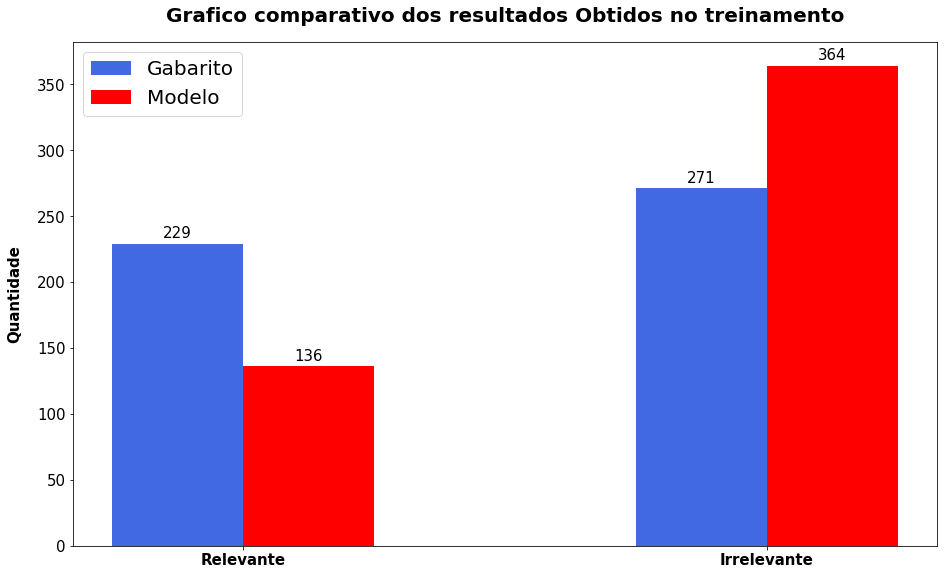

In [101]:
gabarito = novodf.Classificado.value_counts()
treino = novodf['Navy Bayes'].value_counts()

fig = plt.figure(figsize=(12,7))

ax = fig.add_axes([0,0,1,1])

relevante_gabarito = [gabarito[1], gabarito[0]]
relevante_algoritmo = [treino[1], treino[0]]


label = ['Relevante', 'Irrelevante']
x = np.arange(len(label))
largura = 0.25

rects1 = ax.bar(x - largura/2, relevante_gabarito, largura, label="Gabarito", color='royalblue')
rects2 = ax.bar(x + largura/2, relevante_algoritmo, largura, label="Modelo", color='red')

ax.set_title('Grafico comparativo dos resultados Obtidos no treinamento', fontsize=20, pad=20, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=15, labelpad=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(label, fontsize=20, fontweight='bold')
ax.tick_params(labelsize=15)
ax.legend(fontsize=20)

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

autolabel(rects1)
autolabel(rects2)


### Grafico do Teste

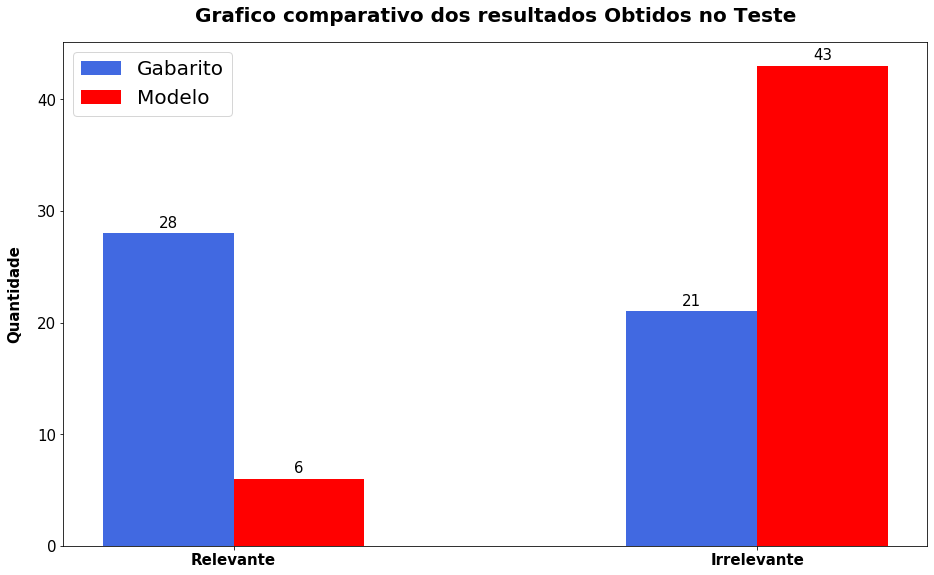

In [102]:
gabarito2 = novodf2.Classificado.value_counts()
teste = novodf2['Navy Bayes'].value_counts()


fig = plt.figure(figsize=(12,7))

ax = fig.add_axes([0,0,1,1])

relevante_gabarito2 = [gabarito2[1], gabarito2[0]]
relevante_algoritmo2 = [teste[1], teste[0]]


label = ['Relevante', 'Irrelevante']
x = np.arange(len(label))
largura = 0.25

rects12 = ax.bar(x - largura/2, relevante_gabarito2, largura, label="Gabarito", color='royalblue')
rects22 = ax.bar(x + largura/2, relevante_algoritmo2, largura, label="Modelo", color='red')

ax.set_title('Grafico comparativo dos resultados Obtidos no Teste', fontsize=20, pad=20, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=15, labelpad=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(label, fontsize=20, fontweight='bold')
ax.tick_params(labelsize=15)
ax.legend(fontsize=20)

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

autolabel(rects12)
autolabel(rects22)

plt.show()